# Risk Prediction for Credit Risk Analysis

## 1. Introduction 

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

### Get data

In [2]:
!wget https://raw.githubusercontent.com/benoitparis/explainable-challenge/master/heloc_dataset_v1.csv

--2023-03-13 06:47:40--  https://raw.githubusercontent.com/benoitparis/explainable-challenge/master/heloc_dataset_v1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 678479 (663K) [text/plain]
Saving to: ‘heloc_dataset_v1.csv’

heloc_dataset_v1.cs 100%[===================>] 662.58K  --.-KB/s    in 0.05s   

2023-03-13 06:47:40 (14.4 MB/s) - ‘heloc_dataset_v1.csv’ saved [678479/678479]



In [3]:
data = pd.read_csv('/content/heloc_dataset_v1.csv')
data.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [4]:
data.shape

(10459, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

In [6]:
data.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,...,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,...,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


## 2. Data Preprocessing

In [7]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [8]:
# Define X and y
X = data.drop('RiskPerformance', axis=1)
y = data['RiskPerformance']

In [9]:
# Factorize y
y = y.map({'Good': 1, 'Bad':0})

In [10]:
# One hot encode 'MaxDelq2PublicRecLast12M', 'MaxDelqEver'
dummies = pd.get_dummies(X[['MaxDelq2PublicRecLast12M', 'MaxDelqEver']].astype(str), drop_first=True)
X.drop(['MaxDelq2PublicRecLast12M', 'MaxDelqEver'], axis=1, inplace=True)

In [11]:
# One-hot encode for -7, -8, -9 values
def get_special_dummies(X, col):
  """
  One-hot encode for -7, -8, -9 values in each column
  """
  X[col + '_-7'] = X[col].apply(lambda row:int(row==-7))
  X[col + '_-8'] = X[col].apply(lambda row:int(row==-8))
  X[col + '_-9'] = X[col].apply(lambda row:int(row==-9))

for col in X.columns:
    get_special_dummies(X, col)

In [12]:
# Concatenate X and dummies
X = pd.concat([X, dummies], axis=1)

In [13]:
# Replace negative values with NaN
X[X<0] = np.nan

In [14]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [15]:
# Pipeline for imputing missing values and scaling
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

## 3. Modelling

In [16]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, auc, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

In [17]:
def gridSearchCV(model, params):

  model_cv = GridSearchCV(model,
                          param_grid=params,
                          cv=5,
                          scoring='roc_auc')
  model_cv.fit(X_train, y_train)
  cv_results = pd.DataFrame(model_cv.cv_results_)[['params', 'mean_test_score']]

  return cv_results

In [28]:
def evaluate(model, plotROC=False):

  model.fit(X_train, y_train)
  probs = model.predict_proba(X_test)
  preds = probs[:,1]
  fpr, tpr, threshold = roc_curve(y_test, preds)
  roc_auc = auc(fpr, tpr)
  print(f"AUC: {roc_auc:.4f}")

  # Find optimal threshold
  rocDF = pd.DataFrame({'fpr': fpr,
                        'tpr': tpr,
                        'threshold': threshold})
  rocDF['tpr - fpr'] = rocDF.tpr - rocDF.fpr
  optimalThreshold = rocDF.threshold[rocDF['tpr - fpr'].idxmax()]

  # Get accuracy over the test set
  y_pred = np.where(preds >= optimalThreshold, 1, 0)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.2f}%")

  # Plot roc auc
  if plotROC:
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


### 3.1 Random Forest

In [19]:
params = {'n_estimators': [50, 100]}
rfc = RandomForestClassifier(random_state=1)
print(gridSearchCV(rfc, params))

                  params  mean_test_score
0   {'n_estimators': 50}         0.790137
1  {'n_estimators': 100}         0.795155


AUC: 0.7705
Accuracy: 0.70%


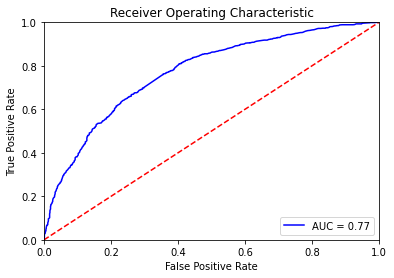

In [29]:
rfc = RandomForestClassifier(n_estimators=500, random_state=1)
evaluate(rfc, plotROC=True)

### 3.2 Logistic Regression

In [30]:
params = {'C': [0.01, 0.1, 1, 10]}
logit = LogisticRegression()
print(gridSearchCV(logit, params))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

        params  mean_test_score
0  {'C': 0.01}         0.802281
1   {'C': 0.1}         0.802326
2     {'C': 1}         0.802358
3    {'C': 10}         0.802322


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.7748
Accuracy: 0.70%


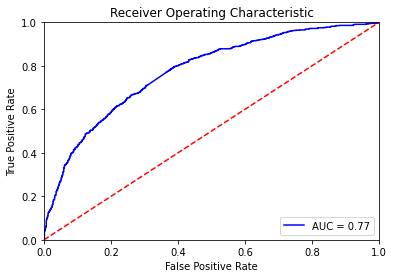

In [33]:
logit = LogisticRegression(C=0.01)
evaluate(logit, plotROC=True)

### 3.3 SVM

In [34]:
params = {'C': [0.01]}
svm = SVC(gamma='auto', random_state=1)
print(gridSearchCV(svm, params))

        params  mean_test_score
0  {'C': 0.01}         0.772735


AUC: 0.7691
Accuracy: 0.71%


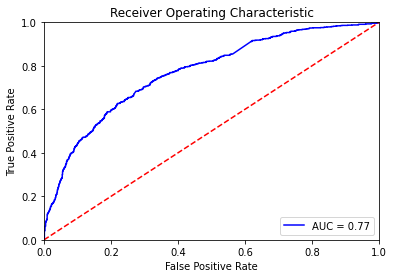

In [35]:
svc = SVC(C=0.1, kernel='linear', degree=2,
          gamma=0.1, random_state=1, probability=True)
evaluate(svc, plotROC=True)